In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid', context='talk')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df_kaggle = pd.read_csv('../data/kaggle_protein_data/pdb_data_seq.csv')
df_kaggle_xray = pd.read_csv('../data/kaggle_protein_data/pdb_data_no_dups.csv')
df_pdb_archive = pd.read_csv('../data/df.csv')
df_pfam_codes = pd.read_csv('../data/df_pfam_codes.csv')

df_k = df_kaggle.copy()
df_xray = df_kaggle_xray.copy()
df_pfam = df_pfam_codes.copy()
df = df_pdb_archive.copy()

In [537]:
print(f'df_k shape: {df_k.shape}')
display(df_k.head(2))
print(f'df_xray shape: {df_xray.shape}')
display(df_xray.head(2))
print(f'df_pfam shape: {df_pfam.shape}')
display(df_pfam.head(2))
print(f'df shape: {df.shape}')
display(df.head(2))

df_k shape: (467304, 5)


,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid


df_xray shape: (141401, 14)


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0


df_pfam shape: (1042647, 13)


,PdbID,DomainID,AsymChain,EntityID,Pfam_Acc,Pfam_ID,Description,IsWeak,Clan_ID,Clan_Acc,UniprotID,UniprotCode,pdb_id
0,101m,1,A,1,PF00042,Globin,Globin,0,Globin,CL0090,MYG_PHYCD,P02185,101m_A
1,102l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-,102l_A


df shape: (722336, 7)


,sequence,pdb_id,mol,length,mol_description,id_pdb,subunit
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN,101m,A
7,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102l_A,protein,165,T4 LYSOZYME,102l,A


In [513]:
df_k.head(10)

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
5,102D,A,CGCAAATTTGCG,24,DNA
6,102D,B,CGCAAATTTGCG,24,DNA
7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
9,103D,A,GTGGAATGGAAC,24,DNA


In [514]:
df_xray.head(5)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [515]:
df.head(5)

,sequence,pdb_id,mol,length,mol_description
0,CCGGCGCCGG,100d_A,na,10,DNA/RNA (5'-R(*CP*)-D(*CP*GP*GP*CP*GP*CP*CP*GP...
1,CCGGCGCCGG,100d_B,na,10,DNA/RNA (5'-R(*CP*)-D(*CP*GP*GP*CP*GP*CP*CP*GP...
2,CGCGAATTCGCG,101d_A,na,12,DNA (5'-D(*CP*GP*CP*GP*AP*AP*TP*TP*(CBR)P*GP*C...
3,CGCGAATTCGCG,101d_B,na,12,DNA (5'-D(*CP*GP*CP*GP*AP*AP*TP*TP*(CBR)P*GP*C...
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN


In [532]:
df_id = df['pdb_id'].str.split('_', expand=True)
print(df_id.shape)
df_id.head(10)

(722336, 2)


,0,1
4,101m,A
7,102l,A
8,102m,A
11,103l,A
12,103m,A
15,104l,A
16,104l,B
17,104m,A
22,105m,A
27,106m,A


In [533]:
df['id_pdb'] = df_id[0]
df['subunit'] = df_id[1]
print(df.shape)
df.head()

(722336, 7)


,sequence,pdb_id,mol,length,mol_description,id_pdb,subunit
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN,101m,A
7,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102l_A,protein,165,T4 LYSOZYME,102l,A
8,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,102m_A,protein,154,MYOGLOBIN,102m,A
11,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103l_A,protein,167,T4 LYSOZYME,103l,A
12,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,103m_A,protein,154,MYOGLOBIN,103m,A


### EXCLUDE NUCLEIC ACIDS:

In [518]:
# Exclude the nucleic acids:
print(f'Full pdb dataset:{df.shape}')
df = df[df['mol']=='protein']
print(f'Excluding DNA/RNA:{df.shape}')

df.head(10)

Full pdb dataset:(767333, 7)
Excluding DNA/RNA:(722336, 7)


,sequence,pdb_id,mol,length,mol_description,id_pdb,subunit
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN,101m,A
7,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102l_A,protein,165,T4 LYSOZYME,102l,A
8,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,102m_A,protein,154,MYOGLOBIN,102m,A
11,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103l_A,protein,167,T4 LYSOZYME,103l,A
12,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,103m_A,protein,154,MYOGLOBIN,103m,A
15,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_A,protein,166,T4 LYSOZYME,104l,A
16,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_B,protein,166,T4 LYSOZYME,104l,B
17,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,104m_A,protein,153,MYOGLOBIN,104m,A
22,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,105m_A,protein,153,MYOGLOBIN,105m,A
27,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,106m_A,protein,154,MYOGLOBIN,106m,A


### MISSING VALUES:

In [519]:
df.isna().sum()

sequence            0
pdb_id              0
mol                 0
length              0
mol_description    24
id_pdb              0
subunit             0
dtype: int64

In [520]:
df_nan = df[df['mol_description'].isna()]
df_nan

,sequence,pdb_id,mol,length,mol_description,id_pdb,subunit
9642,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,1dy3_A,protein,158,NaN,1dy3,A
45416,MLVVPAIDLFRGKVARMIKGRKENTIFYEKDPVELVEKLIEEGFTL...,1qo2_A,protein,241,NaN,1qo2,A
45417,MLVVPAIDLFRGKVARMIKGRKENTIFYEKDPVELVEKLIEEGFTL...,1qo2_B,protein,241,NaN,1qo2,B
124262,ELSENFKKLMKYPYRPCTCTRCIEEQRVSAWFDERFNRSMQPLLTA...,2wnb_A,protein,298,NaN,2wnb,A
336577,MIIPALNLIDGTVVRLHQGDYARQRDYGNDPLPRLQDYAAQGAGVL...,5a5w_A,protein,253,NaN,5a5w,A
336882,ANSVQQQLEALEKSSGGRLGVALINTADNSQILYRADERFAMCSTS...,5a91_A,protein,262,NaN,5a91,A
337299,MIIPALDLIGGTVVRVVRLHQGDYARLRDYGNDPLPRLQDYAAQGA...,5ac6_A,protein,256,NaN,5ac6,A
337300,MIIPALNLIGGTVVRVVRLHQGDYARQRDYGNDPLPRLQDYAAQGA...,5ac7_A,protein,256,NaN,5ac7,A
337301,MIIPALNLIGGTVVRVVRLHQGDYARQRDYGNDPLPRLQDYAAQGA...,5ac7_B,protein,256,NaN,5ac7,B
337302,MIIPALDLIGGTVVRVVRLHQGDYARQRDYGNDPLPRLQDYAAQGA...,5ac8_A,protein,256,NaN,5ac8,A


In [521]:
prot_ids = list(df_nan['id_pdb'].unique())
prot_ids

['1dy3',
 '1qo2',
 '2wnb',
 '5a5w',
 '5a91',
 '5ac6',
 '5ac7',
 '5ac8',
 '5ahe',
 '5ahf',
 '5fjo',
 '5g1t',
 '5g1y',
 '5g2h',
 '5g2i',
 '5g2w',
 '5g3r',
 '5g4e',
 '5g5i']

>NOTE: I found the following classification labels by manually entering the protein id into the pdb search bar.  This was feasable only because there were only 20 missing labels, but figuring out how to use the pdb api for this would be idea in future applications.

In [522]:
missing_lables = {
      '1dy3': 'PYROPHOSPHORYLASE'
    , '1qo2': 'ISOMERASE'
    , '2wnb': 'TRANSFERASE'
    , '5a5w': 'ISOMERASE'
    , '5a91': 'HYDROLASE'
    , '5ac6': 'ISOMERASE'
    , '5ac7': 'ISOMERASE'
    , '5ac8': 'ISOMERASE'
    , '5ahe': 'ISOMERASE'
    , '5ahf': 'ISOMERASE'
    , '5fjo': 'LYASE'
    , '5g1t': 'ISOMERASE'
    , '5g1y': 'ISOMERASE'
    , '5g2h': 'ISOMERASE'
    , '5g2i': 'ISOMERASE'
    , '5g2w': 'ISOMERASE'
    , '5g3r': 'HYDROLASE'
    , '5g4e': 'ISOMERASE'
    , '5g5i': 'ISOMERASE'
}

In [523]:
df['mol_description'] = df['mol_description'].fillna(df['id_pdb'].map(missing_lables))
df.isna().sum()

sequence           0
pdb_id             0
mol                0
length             0
mol_description    0
id_pdb             0
subunit            0
dtype: int64

In [524]:
df['mol_description'].nunique()

81534

## TARGET VARIABLE REFINEMENT:

In [525]:
df.head()

,sequence,pdb_id,mol,length,mol_description,id_pdb,subunit
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN,101m,A
7,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102l_A,protein,165,T4 LYSOZYME,102l,A
8,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,102m_A,protein,154,MYOGLOBIN,102m,A
11,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103l_A,protein,167,T4 LYSOZYME,103l,A
12,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,103m_A,protein,154,MYOGLOBIN,103m,A


In [526]:
df_pfam.head()

,PdbID,DomainID,AsymChain,EntityID,Pfam_Acc,Pfam_ID,Description,IsWeak,Clan_ID,Clan_Acc,UniprotID,UniprotCode
0,101m,1,A,1,PF00042,Globin,Globin,0,Globin,CL0090,MYG_PHYCD,P02185
1,102l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-
2,103l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-
3,104l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-
4,104l,2,B,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-


In [527]:
df_pfam.AsymChain.nunique()
df_pfam.AsymChain.value_counts().head(20)

df_pfam['pdb_id'] = df_pfam['PdbID'] + '_' + df_pfam['AsymChain']

In [528]:
df_pfam.nunique()

PdbID          186544
DomainID         2712
AsymChain        1633
EntityID          113
Pfam_Acc        10889
Pfam_ID         10889
Description     11517
IsWeak              2
Clan_ID           615
Clan_Acc          615
UniprotID       57838
UniprotCode     57515
pdb_id         655421
dtype: int64

In [529]:
df_pfam.pdb_id.head(10)

0    101m_A
1    102l_A
2    103l_A
3    104l_A
4    104l_B
5    104m_A
6    105m_A
7    107l_A
8    108l_A
9    109l_A
Name: pdb_id, dtype: object

In [540]:
print(df_class.shape)
df_class.head()

(1042647, 5)


,pdb_id,Pfam_ID,Description,Clan_ID,id_pdb
0,101m_A,Globin,Globin,Globin,101m
1,102l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,102l
2,103l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,103l
3,104l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,104l
4,104l_B,Phage_lysozyme,Phage lysozyme,Lysozyme,104l


In [542]:
df_class = df_pfam[['pdb_id', 'Pfam_ID', 'Description', 'Clan_ID']].copy()
df_class['id_pdb'] = df_pfam['PdbID']

df_class['id_pdb'] = df_class['id_pdb'].str.lower()
df['id_pdb'] = df['id_pdb'].str.lower()

df_pfam_left = df.merge(df_class, how='left', on='id_pdb')
print(f'df_pfam_left.shape: {df_pfam_left.shape}')
      
df_pfam_right = df.merge(df_class, how='right', on='id_pdb')
print(f'df_pfam_right.shape: {df_pfam_right.shape}')
      
df_pfam_inner = df.merge(df_class, how='inner', on='id_pdb')
print(f'df_pfam_inner.shape: {df_pfam_inner.shape}')
      
df_pfam_outer = df.merge(df_class, how='outer', on='id_pdb')
print(f'df_pfam_outer.shape: {df_pfam_outer.shape}')
print(f'df.shape: {df.shape}')
print(f'df_pfam.shape: {df_pfam.shape}')


df_pfam_left.shape: (31634152, 11)
df_pfam_right.shape: (31591931, 11)
df_pfam_inner.shape: (31591874, 11)
df_pfam_outer.shape: (31634209, 11)
df.shape: (722336, 7)
df_pfam.shape: (1042647, 13)


In [531]:
df_class = df_pfam[['pdb_id', 'Pfam_ID', 'Description', 'Clan_ID']].copy()
df_class['id_pdb'] = df_pfam['PdbID']

df_pfam_left = df.merge(df_class, how='left', on='id_pdb')
print(f'df_pfam_left.shape: {df_pfam_left.shape}')
      
df_pfam_inner = df.merge(df_class, how='inner', on='id_pdb')
print(f'df_pfam_inner.shape: {df_pfam_inner.shape}')
      
df_pfam_outer = df.merge(df_class, how='outer', on='id_pdb')
print(f'df_pfam_outer.shape: {df_pfam_outer.shape}')
print(f'df.shape: {df.shape}')
print(f'df_pfam.shape: {df_pfam.shape}')

# df.head()

df_pfam_left.shape: (31634152, 11)
df_pfam_inner.shape: (31591874, 11)
df_pfam_outer.shape: (31634209, 11)
df.shape: (722336, 7)
df_pfam.shape: (1042647, 13)


In [543]:
# Keeping the inner merge df:
df = df_pfam_inner.copy()

In [544]:
df_xray = df_kaggle_xray.copy()
df_xray.head(2)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0


In [545]:
# Drop data relevent to xray crystallography:
df_xray.drop(columns=[
    'resolution',
    'crystallizationMethod',
    'crystallizationTempK',
    'densityMatthews',
    'experimentalTechnique',
    'densityPercentSol',
    'pdbxDetails',
    'phValue',
    'publicationYear'], inplace=True)

In [546]:
df_xray.head(5)

,structureId,classification,macromoleculeType,residueCount,structureMolecularWeight
0,100D,DNA-RNA HYBRID,DNA/RNA Hybrid,20,6360.30
1,101D,DNA,DNA,24,7939.35
2,101M,OXYGEN TRANSPORT,Protein,154,18112.80
3,102D,DNA,DNA,24,7637.17
4,102L,HYDROLASE(O-GLYCOSYL),Protein,165,18926.61


In [547]:
df_xray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   macromoleculeType         137636 non-null  object 
 3   residueCount              141401 non-null  int64  
 4   structureMolecularWeight  141401 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.4+ MB


In [548]:
# Drop the nucleic acids again and the column once made redundant:
df_xray = df_xray[df_xray['macromoleculeType']=='Protein']
df_xray.drop(columns=['macromoleculeType'], inplace=True)

# Convert molecular weight to kDa from Da:
df_xray['structureMolecularWeight'] = round(df_xray['structureMolecularWeight']*0.001, 2)

# Rename columns:
df_xray.rename(
    columns=({
          'structureId': 'id_pdb'
        ,	'classification': 'class'
        ,	'residueCount': 'length'
        ,	'structureMolecularWeight': 'kDa'
    }), inplace=True
)

# Prep ids for merge:
df_xray['id_pdb'] = df_xray['id_pdb'].str.lower()
df_xray.head()

,id_pdb,class,length,kDa
2,101m,OXYGEN TRANSPORT,154,18.11
4,102l,HYDROLASE(O-GLYCOSYL),165,18.93
5,102m,OXYGEN TRANSPORT,154,18.01
7,103l,HYDROLASE(O-GLYCOSYL),167,19.09
8,103m,OXYGEN TRANSPORT,154,18.09


In [551]:
df_xray['id_pdb'] = df_xray['id_pdb'].str.lower()
df['id_pdb'] = df['id_pdb'].str.lower()

id_df_inner = df.merge(df_xray, how='inner', on='id_pdb')
print(f'id_df_inner.shape: {id_df_inner.shape}')

id_df_outer = df.merge(df_xray, how='outer', on='id_pdb')
print(f'id_df_outer.shape: {id_df_outer.shape}')

id_df_left = df.merge(df_xray, how='left', on='id_pdb')
print(f'id_df_left.shape: {id_df_left.shape}')

id_df_right = df.merge(df_xray, how='right', on='id_pdb')
print(f'id_df_right.shape: {id_df_right.shape}')


# df.head()

id_df_inner.shape: (11424367, 14)
id_df_outer.shape: (31606231, 14)
id_df_left.shape: (31602339, 14)
id_df_right.shape: (11428259, 14)


In [552]:
# Once again keeping the inner:
df = id_df_inner.copy()
display(df.head())
df.isna().sum()

,sequence,pdb_id_x,mol,length_x,mol_description,id_pdb,subunit,pdb_id_y,Pfam_ID,Description,Clan_ID,class,length_y,kDa
0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN,101m,A,101m_A,Globin,Globin,Globin,OXYGEN TRANSPORT,154,18.11
1,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102l_A,protein,165,T4 LYSOZYME,102l,A,102l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),165,18.93
2,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103l_A,protein,167,T4 LYSOZYME,103l,A,103l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),167,19.09
3,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_A,protein,166,T4 LYSOZYME,104l,A,104l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54
4,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_A,protein,166,T4 LYSOZYME,104l,A,104l_B,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54


sequence               0
pdb_id_x               0
mol                    0
length_x               0
mol_description        0
id_pdb                 0
subunit                0
pdb_id_y           20410
Pfam_ID                0
Description            0
Clan_ID                0
class                  1
length_y               0
kDa                    0
dtype: int64

In [556]:
subs_mix = df[df['pdb_id_x']!=df['pdb_id_y']].shape
subs_mix

(10969945, 14)

In [558]:
df.shape[0]-subs_mix[0]

454422

In [554]:
df[df['pdb_id_x']!=df['pdb_id_y']].head()

,sequence,pdb_id_x,mol,length_x,mol_description,id_pdb,subunit,pdb_id_y,Pfam_ID,Description,Clan_ID,class,length_y,kDa
4,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_A,protein,166,T4 LYSOZYME,104l,A,104l_B,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54
5,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_B,protein,166,T4 LYSOZYME,104l,B,104l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54
13,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,10gs_A,protein,209,GLUTATHIONE S-TRANSFERASE P1-1,10gs,A,10gs_B,GST_N,"Glutathione S-transferase, N-terminal domain",Thioredoxin,TRANSFERASE/TRANSFERASE INHIBITOR,418,47.83
15,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,10gs_A,protein,209,GLUTATHIONE S-TRANSFERASE P1-1,10gs,A,10gs_B,GST_C_3,"Glutathione S-transferase, C-terminal domain",GST_C,TRANSFERASE/TRANSFERASE INHIBITOR,418,47.83
16,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,10gs_B,protein,209,GLUTATHIONE S-TRANSFERASE P1-1,10gs,B,10gs_A,GST_N,"Glutathione S-transferase, N-terminal domain",Thioredoxin,TRANSFERASE/TRANSFERASE INHIBITOR,418,47.83


In [503]:
# df_inner = df.merge(df_xray, how='inner', on=('id_pdb', 'length'))
# print(f'df_inner.shape: {df_inner.shape}')

# df_outer = df.merge(df_xray, how='outer', on=('id_pdb', 'length'))
# print(f'df_outer.shape: {df_outer.shape}')

# df_left = df.merge(df_xray, how='left', on=('id_pdb', 'length'))
# print(f'df_left.shape: {df_left.shape}')


# # df.head()

df_inner.shape: (75550, 12)
df_outer.shape: (31709513, 12)
df_left.shape: (31634391, 12)


In [559]:
df_subs = df[df['pdb_id_x']==df['pdb_id_y']]

# Trial setting this sub-set as df temp variable:
df = df_subs.copy()

In [561]:
df.head()

,sequence,pdb_id_x,mol,length_x,mol_description,id_pdb,subunit,pdb_id_y,Pfam_ID,Description,Clan_ID,class,length_y,kDa
0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101m_A,protein,154,MYOGLOBIN,101m,A,101m_A,Globin,Globin,Globin,OXYGEN TRANSPORT,154,18.11
1,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102l_A,protein,165,T4 LYSOZYME,102l,A,102l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),165,18.93
2,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103l_A,protein,167,T4 LYSOZYME,103l,A,103l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),167,19.09
3,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_A,protein,166,T4 LYSOZYME,104l,A,104l_A,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54
6,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,104l_B,protein,166,T4 LYSOZYME,104l,B,104l_B,Phage_lysozyme,Phage lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),332,37.54


In [563]:
# Rearrange columns:
df = df[[   
      'id_pdb'
    , 'subunit'
    , 'mol_description'
    , 'Description'
    , 'Pfam_ID'
    , 'Clan_ID'
    , 'class'
    , 'kDa'
    , 'sequence'
]].copy()

df['len'] = df['sequence'].str.len()

In [564]:
df.head()

,id_pdb,subunit,mol_description,Description,Pfam_ID,Clan_ID,class,kDa,sequence,len
0,101m,A,MYOGLOBIN,Globin,Globin,Globin,OXYGEN TRANSPORT,18.11,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154
1,102l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),18.93,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165
2,103l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),19.09,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167
3,104l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),37.54,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,166
6,104l,B,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),37.54,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,166


In [565]:
df.to_csv('../data/model_data.csv', index=False)
df.shape

(454422, 10)

In [566]:
df.isna().sum()

id_pdb             0
subunit            0
mol_description    0
Description        0
Pfam_ID            0
Clan_ID            0
class              1
kDa                0
sequence           0
len                0
dtype: int64

In [567]:
df.dropna(inplace=True)

In [568]:
df.nunique()

id_pdb             119735
subunit               183
mol_description     46093
Description          9710
Pfam_ID              9397
Clan_ID               601
class                4256
kDa                 24777
sequence            79399
len                  1300
dtype: int64

In [569]:
df.rename(columns=({
      'mol_description': 'molec'
    , 'Description': 'description'
    , 'Pfam_ID': 'pfam_id'
    , 'Clan_ID': 'clan_id'
}), inplace=True)

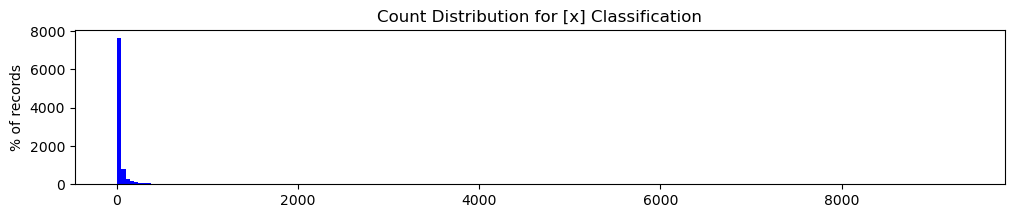

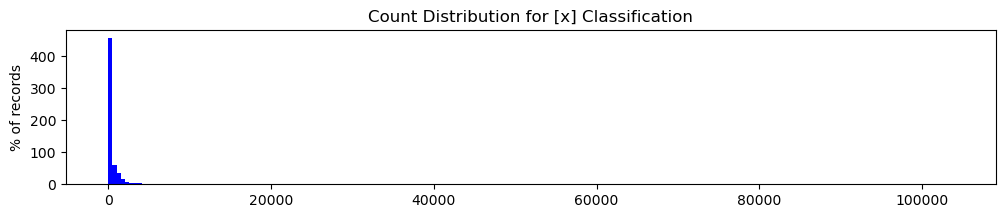

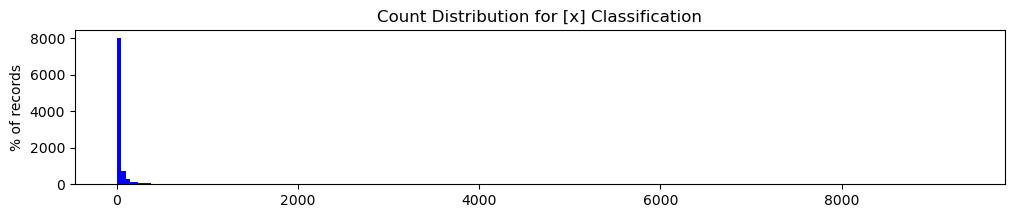

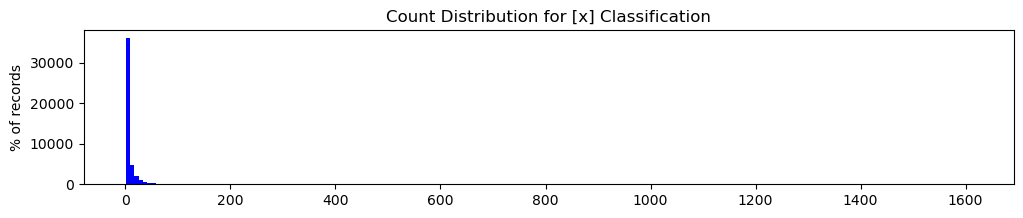

In [580]:
# Look at pfam_id type class_freq = cf
cf_pfam = df['pfam_id'].value_counts()
cf_clan = df['clan_id'].value_counts()
cf_desc = df['description'].value_counts()
cf_mole = df['molec'].value_counts()


# display(cf.head(20))
x_list = [cf_pfam, cf_clan, cf_desc ,cf_mole]
for x in x_list:
    label = '[x]'
    #plot cf
    plt.figure(figsize=(12,2))
    plt.hist(x, bins=200, color = 'blue')
    plt.title(f'Count Distribution for {label} Classification')
    plt.ylabel('% of records')
    plt.show()

In [584]:
# Get clan_id label where counts are over 1000
label = np.asarray(cf_clan[(cf_clan > 1000)].index)
print(len(label))
# Filter dataset's records for clan_id label > 1000
data = df[df.clan_id.isin(label)]
data = data.drop_duplicates(subset=['clan_id', 'sequence'])  # leaving more rows results in duplciates / index related?

print(label)
print('%d is the number of records in the final filtered dataset' %data.shape[0])

84
['-' 'Ig' 'NADP_Rossmann' 'NTN' 'P-loop_NTPase' 'TPR' 'Beta_propeller'
 'PKinase' 'E-set' 'TIM_barrel' 'HTH' 'Glyco_hydro_tim' 'EF_hand'
 'Thioredoxin' 'Concanavalin' 'Cupin' 'AB_hydrolase' 'PBP' 'LRR'
 'Ubiquitin' 'Ferritin' 'Peptidase_PA' 'Globin' 'PLP_aminotran'
 'Ion_channel' 'Thiolase' 'Nucleoplasmin' 'Peptidase_AA' 'CU_oxidase'
 'Actin_ATPase' 'Lysozyme' 'MHC' 'Ank' 'EGF' 'GBD' 'ClpP_crotonase' 'HUP'
 'OB' 'Beta-lactamase' 'Peptidase_MA' 'Trefoil' 'HEXAPEP' 'GHD'
 'Acetyltrans' 'Peptidase_CA' 'Amidohydrolase' '6_Hairpin' 'Peptidase_MH'
 'HAD' 'GFP' 'Transthyretin' 'Peroxidase' 'GST_C' 'THDP-binding'
 'Enolase_TIM' 'Insulin' 'ALDH-like' 'AAA_lid' 'GT-A' 'PUP'
 'Gal_mutarotase' 'SH3' 'GT-B' 'HotDog' 'GADPH_aa-bio_dh' 'Enolase_N'
 'C_Lectin' 'PH' 'PDZ-like' 'RNase_H' 'Hybrid' 'RdRP' 'Tudor'
 'Phosphatase' 'Calycin' 'His_Kinase_A' 'NTF2' 'HD_PDEase' 'Cytochrome-c'
 'Viral_Gag' 'Periplas_BP' 'Sialidase' 'DNA_clamp' 'GroES']
72165 is the number of records in the final filtered datas

In [587]:
data.shape

(72165, 10)

In [588]:
## Could add n-grams
## https://stackoverflow.com/questions/18658106/quick-implementation-of-aaacter-n-grams-using-python
# jump_size !=1 -> less overlap in n-grams. 
def aa_grams(seq, n = 3, jump_size = 2):
    return [seq[i:i + n] for i in range(0, len(seq) - n + 1, jump_size)]

In [608]:
data.sequence.head(3)

0    MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
1    MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
2    MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
Name: sequence, dtype: object

In [589]:
data.head(3).sequence.apply(aa_grams)

0    [MVL, LSE, EGE, EWQ, QLV, VLH, HVW, WAK, KVE, ...
1    [MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ...
2    [MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ...
Name: sequence, dtype: object

In [591]:
data["3_aa"] = data.sequence.apply(aa_grams)
data.head()

,id_pdb,subunit,molec,description,pfam_id,clan_id,class,kDa,sequence,len,3_aa
0,101m,A,MYOGLOBIN,Globin,Globin,Globin,OXYGEN TRANSPORT,18.11,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,"[MVL, LSE, EGE, EWQ, QLV, VLH, HVW, WAK, KVE, ..."
1,102l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),18.93,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,"[MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ..."
2,103l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),19.09,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,"[MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ..."
3,104l,A,T4 LYSOZYME,Phage lysozyme,Phage_lysozyme,Lysozyme,HYDROLASE(O-GLYCOSYL),37.54,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,166,"[MNI, IFE, EML, LRI, IDE, EGL, LRL, LKI, IYK, ..."
7,104m,A,MYOGLOBIN,Globin,Globin,Globin,OXYGEN TRANSPORT,18.03,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,153,"[VLS, SEG, GEW, WQL, LVL, LHV, VWA, AKV, VEA, ..."


In [593]:
data.to_csv("../data/model_df_3aa_grams.csv.gz", index=False, compression="gzip")

In [594]:
# 3). ----- Train Test Split -----

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    data['sequence'], data['clan_id'], test_size = 0.1, random_state = 137)

# Create a Count Vectorizer to gather the unique elements in sequence
cv = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))

# Fit and Transform CountVectorizer
cv.fit(X_train)
X_train_df = cv.transform(X_train)
X_test_df = cv.transform(X_test)

#Print a few of the features
print(cv.get_feature_names_out()[-20:])

['zigi' 'ziwz' 'zkal' 'zkky' 'zknt' 'zkyh' 'zlik' 'zlzk' 'zpsz' 'zpvm'
 'zrgd' 'zrvi' 'zssk' 'ztvl' 'ztzk' 'zvbd' 'zvib' 'zvka' 'zwdl' 'zzvb']


### 4). Machine Learning Models

Initially I will try to fit a Naive Bayes model as other researchers have done for these types of vectorized features. Adaboost will be used as well for comparison.

In [595]:
# 4). ------ Machine Learning Models ------

# Make a prediction dictionary to store accuracies
prediction = dict()

# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_df, y_train)

NB_pred = model.predict(X_test_df)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test)

print( prediction['MultinomialNB'])

0.6645420534848275


In [596]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train_df, y_train)

ada_pred = model.predict(X_test_df)
prediction["Adaboost"] = accuracy_score(ada_pred, y_test)

print(prediction["Adaboost"])

0.3515311071082167


<AxesSubplot: >

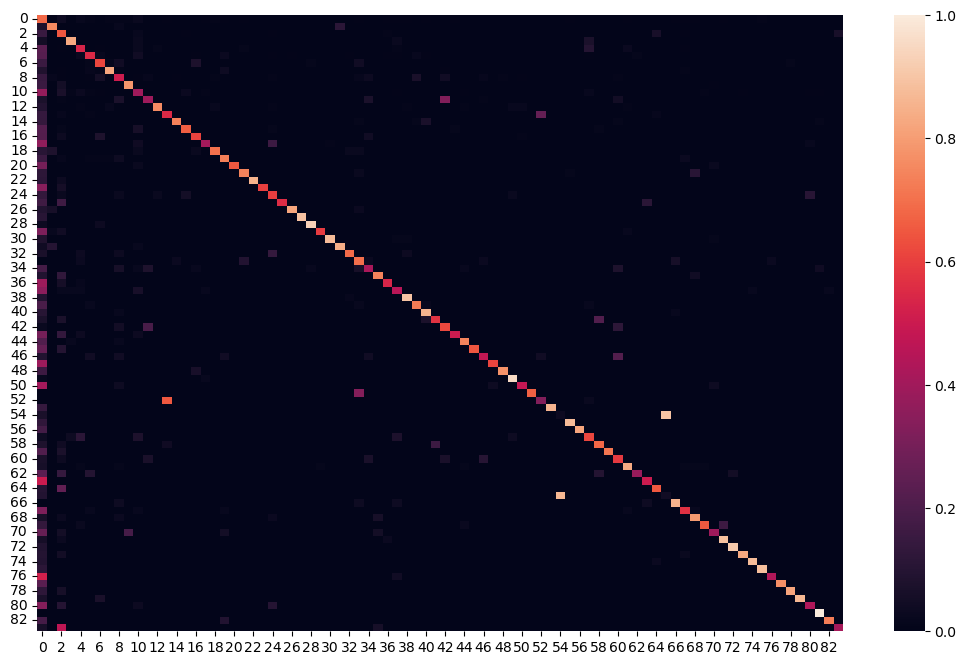

In [598]:
# 5). ----- Plot Confusion Matrix for NB -----

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, NB_pred, labels = label)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

In [607]:
print(label[54])
print(label[65])

Enolase_TIM
Enolase_N


In [605]:
print(classification_report(y_test, NB_pred, target_names = label))

                 precision    recall  f1-score   support

              -       0.66      0.69      0.67      2261
             Ig       0.46      0.48      0.47        23
  NADP_Rossmann       0.27      0.62      0.37        26
            NTN       0.78      0.61      0.68        87
  P-loop_NTPase       0.88      0.82      0.85        17
            TPR       0.56      0.50      0.53        30
 Beta_propeller       0.79      0.59      0.68        44
        PKinase       0.77      0.65      0.70        31
          E-set       0.80      0.69      0.74        29
     TIM_barrel       0.81      0.89      0.85        57
            HTH       0.53      0.62      0.57        65
Glyco_hydro_tim       0.84      0.93      0.89        29
        EF_hand       0.64      0.85      0.73        27
    Thioredoxin       0.94      0.88      0.91        33
   Concanavalin       0.63      0.74      0.68        23
          Cupin       0.87      0.74      0.80        72
   AB_hydrolase       0.80    

In [606]:
# #Print F1 score metrics
# f1_metrics = pd.DataFrame(classification_report(y_test, NB_pred, target_names = label))
# f1_metrics.head()

## PLANS FOR IMPROVEMENT:

- amino acid residue feature engineering:
    - counting the frequencies of each aa residue per protein
- using those frequencies to account for potentially numerically consistent biological trends such as the overal pka (partial acidic measures of the free COO and NH2 residue ends and possible the side chains of the more hydrophilic and electrostatically charged side chain residues.  
- That in addition to the overall hydrophobicity measures I expect should likely help classify proteins on a broad but highly specific level with respect to the proteins biological function: 
        - structural , 
        - intrinsically disordered, 
        - globular, and 
        - transmembranous proteins.
- closer look at the protein classification names for example, the labels 'Enolase_TIM' and 'Enolase_N' are often mis-labeled as each other, so they should become the same label.
- NLP method of vectorization could be poked a a bit, this was run with 3_aa sequences only.
- There is an additional dataset I think could prove useful if incorporated here, which classifies sub-sections of protein sequences based on well known structural motifs and functional protein sub domains. 
    - for example dna-clamps, or structural ternary motifs such as particular folding patterns
        - beta-barrels, beta-sheets, hair-pins, etc.

[table of amino acid physical properties](https://www.thermofisher.com/ca/en/home/life-science/protein-biology/protein-biology-learning-center/protein-biology-resource-library/pierce-protein-methods/amino-acid-physical-properties.html)


In [ ]:
aminos = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for letter in aminos:
    df_train[letter] = df_train.protein_sequence.str.count(letter)
    df_test[letter] = df_test.protein_sequence.str.count(letter)

In [29]:
df_aa = pd.read_csv('../research/aa_phys_properties.csv')
df_aa

,Amino Acid,Code,Hydropathy,Charge,pKa NH2,pKa COOH,pK(R),Solubility
0,Arginine,R,hydrophilic,+,9.09,2.18,13.2,71.8
1,Asparagine,N,hydrophilic,N,8.80,2.02,,2.4
2,Aspartate,D,hydrophilic,-,9.60,1.88,3.65,0.42
3,Glutamate,E,hydrophilic,-,9.67,2.19,4.25,0.72
4,Glutamine,Q,hydrophilic,N,9.13,2.17,,2.6
5,Lysine,K,hydrophilic,+,10.28,8.90,2.2,NaN
6,Serine,S,hydrophilic,N,9.15,2.21,,36.2
7,Threonine,T,hydrophilic,N,9.12,2.15,,freely
8,Cysteine,C,moderate,N,10.78,1.71,8.33,freely
9,Histidine,H,moderate,+,8.97,1.78,6,4.19
